# Text Processing

In [29]:
import pandas as pd

data = pd.read_csv("Combined Data.csv")

data.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [33]:
data.columns
data.dtypes

,0
Unnamed: 0,int64
statement,object
status,object
clean,object


## Step 1:  Remove URLs, Mentions, and Hashtags



*  Remove the URL
*  Remove mentions and hastags



In [32]:
import re

def clean_text(text):
  text = str(text)
  text = re.sub(r'http\S+|www\S+','',text)
  text = re.sub(r'@\w+|#\w+','',text)
  return text


data['clean'] = data['statement'].apply(clean_text)
print(data[['statement','clean']].head(n=2))

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   

                                               clean  
0                                         oh my gosh  
1  trouble sleeping, confused mind, restless hear...  


## Step 2: Lowercase Conversion

In [35]:
data['clean'] = data['clean'].str.lower()
print(data[['statement','clean']].head(n=2))

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   

                                               clean  
0                                         oh my gosh  
1  trouble sleeping, confused mind, restless hear...  


## Step 3: Remove Punctuation and Numbers

In [37]:
import string

def remove_pn(text):
  text = str(text)
  return ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

data['clean'] = data['statement'].apply(remove_pn)
print(data[['statement','clean']].head(n=6))

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   
5  every break, you must be nervous, like somethi...   

                                               clean  
0                                         oh my gosh  
1  trouble sleeping confused mind restless heart ...  
2  All wrong back off dear forward doubt Stay in ...  
3  Ive shifted my focus to something else but Im ...  
4  Im restless and restless its been a month now ...  
5  every break you must be nervous like something...  


## Step 4: Tokenization

In [38]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
data['Tokens'] = data['clean'].apply(word_tokenize)
print(data[['statement', 'Tokens']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                              Tokens  
0                                     [oh, my, gosh]  
1  [trouble, sleeping, confused, mind, restless, ...  
2  [All, wrong, back, off, dear, forward, doubt, ...  
3  [Ive, shifted, my, focus, to, something, else,...  
4  [Im, restless, and, restless, its, been, a, mo...  


## Step 5: Remove Stop Words

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(data[['statement', 'Tokens']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                              Tokens  
0                                         [oh, gosh]  
1  [trouble, sleeping, confused, mind, restless, ...  
2  [All, wrong, back, dear, forward, doubt, Stay,...  
3  [Ive, shifted, focus, something, else, Im, sti...  
4   [Im, restless, restless, month, boy, What, mean]  


## Stemming or Lemmatization

In [40]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

data['Tokens'] = data['Tokens'].apply(stem_words)
print(data[['statement', 'Tokens']].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                              Tokens  
0                                         [oh, gosh]  
1  [troubl, sleep, confus, mind, restless, heart,...  
2  [all, wrong, back, dear, forward, doubt, stay,...  
3  [ive, shift, focu, someth, els, im, still, worri]  
4   [im, restless, restless, month, boy, what, mean]  


In [41]:
def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

data['Tokens'] = data['Tokens'].apply(lemmatize_words)
print(data[['statement', 'Tokens']].head())

                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                              Tokens  
0                                         [oh, gosh]  
1  [troubl, sleep, confus, mind, restless, heart,...  
2  [all, wrong, back, dear, forward, doubt, stay,...  
3   [ive, shift, focu, someth, el, im, still, worri]  
4   [im, restless, restless, month, boy, what, mean]  



 Text processing completed
 # Visualization

In [42]:
from collections import Counter

all_tokens = [word for tokens in data['Tokens'] for word in tokens]
word_counts = Counter(all_tokens)
print(word_counts.most_common(10))

[('i', 332473), ('feel', 45570), ('like', 39647), ('want', 33648), ('get', 29378), ('’', 26549), ('go', 26300), ('know', 25556), ('life', 22330), ('time', 21290)]


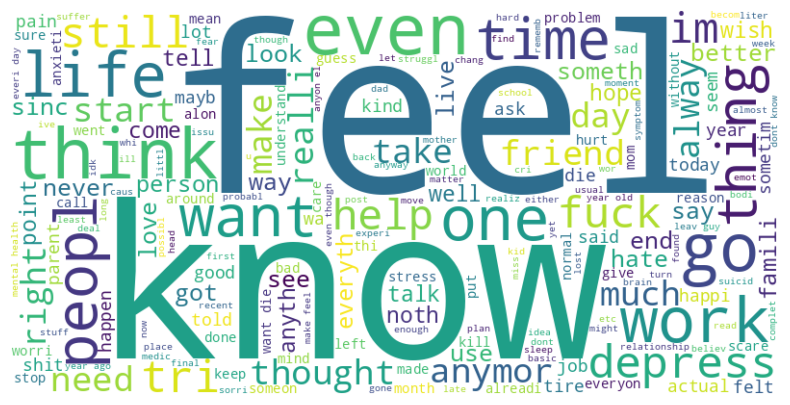

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Steps for Text Classification - Sentiment Analysis

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Data Prep

In [46]:
data.head(n=2)

,Unnamed: 0,statement,status,clean,Tokens
0,0,oh my gosh,Anxiety,oh my gosh,"[oh, gosh]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[troubl, sleep, confus, mind, restless, heart,..."


In [50]:
data['Processed_Text'] = data['Tokens'].apply(lambda x: ' '.join(x))
print(data[['Processed_Text', 'status']].head(n=2
                                              ))

                                     Processed_Text   status
0                                           oh gosh  Anxiety
1  troubl sleep confus mind restless heart all tune  Anxiety


In [49]:
# check the unique value of status column
data['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

# Split Dataset

In [51]:
X = data['Processed_Text']
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 42434, Test samples: 10609


# Convert Text to Numerical Features

In [52]:
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of TF-IDF matrix: {X_train_tfidf.shape}")

Shape of TF-IDF matrix: (42434, 1000)


# Model Train

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for best split
}

model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {best_params}")



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
# # Train the model
# model.fit(X_train_tfidf, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test_tfidf)


# Evaluate the best model
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Evaluate the Model

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.78      0.61      0.68       779
             Bipolar       0.90      0.55      0.69       580
          Depression       0.62      0.76      0.69      3100
              Normal       0.82      0.93      0.87      3327
Personality disorder       0.99      0.37      0.54       248
              Stress       0.87      0.34      0.49       557
            Suicidal       0.65      0.55      0.60      2018

            accuracy                           0.72     10609
           macro avg       0.80      0.59      0.65     10609
        weighted avg       0.74      0.72      0.71     10609

Confusion Matrix:
 [[ 477    5  164  110    0    7   16]
 [  23  321  154   63    0    3   16]
 [  32   13 2370  194    1    5  485]
 [  26    2  128 3105    0    9   57]
 [  13    5   85   48   91    3    3]
 [  43    3  204   81    0  192   34]
 [   1    6  709  183    0    2 1117]]
